In [3]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


lat = "40.7812"
lon = "-73.2462"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.7812,-73.2462',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.2462, 40.7812]},
 'properties': {'@id': 'https://api.weather.gov/p

In [5]:
forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)

json = new_request.json()
json                           
           

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.2495328, 40.7892106],
    [-73.2541595, 40.767558199999996],
    [-73.2255806, 40.76405389999999],
    [-73.2209481, 40.78570599999999],
    [-73.2495328, 40.7892106]]]},
 'properties': {'updated': '2023-03-16T23:57:15+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-17T00:33:20+00:00',
  'updateTime': '2023-03-16T23:57:15+00:00',
  'validTimes': '2023-03-16T17:00:00+00:00/P7DT20H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 20.1168},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-16T20:00:00-04:00',
    'endTime': '2023-03-17T06:00:00-

In [6]:
data_file=open("weather_data.csv","w",newline="",encoding="utf-8")
csv_writer=csv.writer(data_file)
csv_writer.writerow(["Day","Temp","Description"])

for i in json['properties']['periods']:
    name=i['name']
    temp=i['temperature']
    detail=i['detailedForecast']
    
    csv_writer.writerow([name,temp,detail])
data_file.close()
    

In [7]:
sheet=pd.read_csv("weather_data.csv")
sheet

,Day,Temp,Description
0,Tonight,37,"Partly cloudy, with a low around 37. Southwest..."
1,Friday,54,A slight chance of rain after 2pm. Partly sunn...
2,Friday Night,39,A chance of rain. Mostly cloudy. Low around 39...
3,Saturday,55,"Mostly sunny, with a high near 55. Northwest w..."
4,Saturday Night,29,"Mostly clear, with a low around 29. West wind ..."
5,Sunday,43,"Sunny, with a high near 43."
6,Sunday Night,29,"Mostly clear, with a low around 29."
7,Monday,48,"Sunny, with a high near 48."
8,Monday Night,34,"Partly cloudy, with a low around 34."
9,Tuesday,52,"Sunny, with a high near 52."


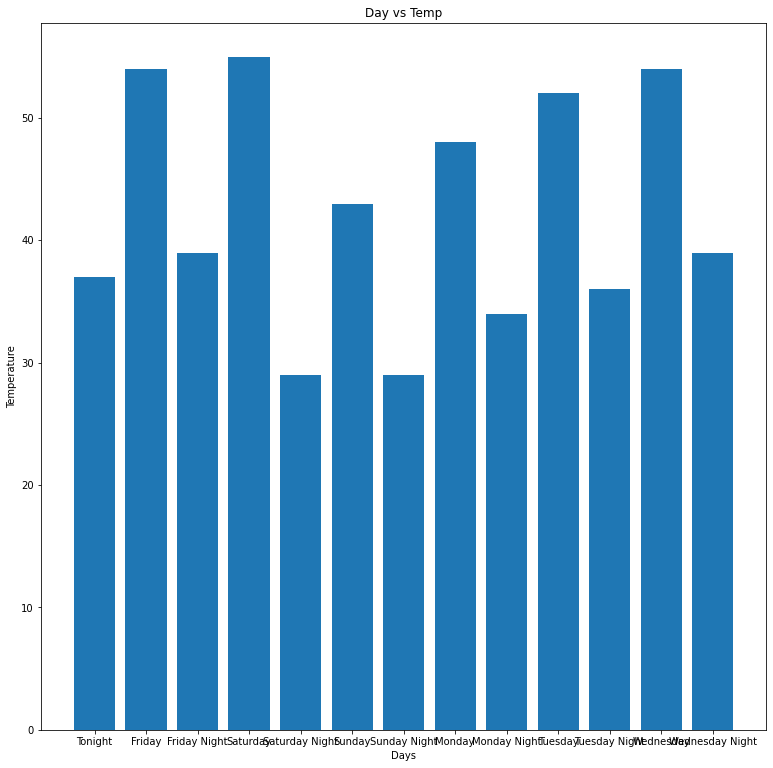

In [9]:
df=pd.DataFrame(sheet)

day=df["Day"]
temp=df["Temp"]

fig=plt.figure(figsize=(13,13))
plt.bar(day[0:13],temp[0:13])

plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Day vs Temp")

plt.show()



In [10]:
file=requests.get('https://date.nager.at/api/v3/PublicHolidays/2023/SV')
json_file2=file.json()
json_file2

[{'date': '2023-05-01',
  'localName': 'Día del trabajo',
  'name': 'Labor Day',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-03',
  'localName': 'Día de la Cru',
  'name': 'The Day of the Cross',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-07',
  'localName': 'Día del Soldado',
  'name': "Soldiers' Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día de las Madres',
  'name': "Mother's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día del Padre',
  'name': "Father's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  

In [6]:
#/api/v3/CountryInfo/{countryCode} : in order to use this call, you must enter a specific country code, and the
#API will return the countries info, including it's continent, official name, and a list of dictionaries containing
#the info of the countries that border it.

#/api/v3/AvailableCountries: this call requires no info to be entered, and returns every country that is listed
#providing both the country name and country code.

#/api/v3/LongWeekend/{year}/{countryCode}: when entering a specific year and country code to the end of the call,
#the API returns the amount of instances a long weekend will occur,including the start date, end date, the amount
#of days and if a "bridge day" is needed, aka if you need to take a day off in order for the long weekend to occur.

#/api/v3/PublicHolidays/{year}/{countryCode}: when entering a specific year and country code tot he end of the call,
#the API returns the amount of public holidays there sre for the country, including it's date, if the holiday
#is on the same day every year, if it is a global holiday, the counties that celebrate the holiday, its launch
#year, and the type of holiday it is.

#/api/v3/IsTodayPublicHoliday/{countryCode}: When entering a country code to the end of the call, the API will
#return either 200 - it is a public holiday , or 204 - today is not a public holiday. 

#/api/v3/NextPublicHolidays/{countryCode}: When entering a country code to the end of the call, the API will
#return the countries holidays for the next 356 days, providing the same info as the #/api/v3/PublicHolidays/{year}/{countryCode}
#call

#/api/v3/NextPublicHolidaysWorldwide: No info needs to be entered, and when this call is executed it returns all
#the public holidays that will occur within a week of when the call is executed, including the date of the holiday, name
#and local name, country code, if the holiday is fixed, if it is a global holiday, the amount of counties that
#celebrate it, its launch year and the type of holiday.


{'commonName': 'Russia',
 'officialName': 'Russian Federation',
 'countryCode': 'RU',
 'region': 'Europe',
 'borders': [{'commonName': 'Azerbaijan',
   'officialName': 'Republic of Azerbaijan',
   'countryCode': 'AZ',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Belarus',
   'officialName': 'Republic of Belarus',
   'countryCode': 'BY',
   'region': 'Europe',
   'borders': None},
  {'commonName': 'China',
   'officialName': "People's Republic of China",
   'countryCode': 'CN',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Estonia',
   'officialName': 'Republic of Estonia',
   'countryCode': 'EE',
   'region': 'Europe',
   'borders': None},
  {'commonName': 'Finland',
   'officialName': 'Republic of Finland',
   'countryCode': 'FI',
   'region': 'Europe',
   'borders': None},
  {'commonName': 'Georgia',
   'officialName': 'Georgia',
   'countryCode': 'GE',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Kazakhstan',
   'officialName': 'Republic o

In [35]:
countries_list=['US','BY','TH','CH','ES','KR','LC','RU','PL','JP','HT']
countries_holidays=[]
for i in countries_list:
    code=str(i)
    furl=requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{code}")
    jason=furl.json()
    countries_holidays.append(jason[0:]["name"])
print(len(countries_holidays))
#here, im not sure why the for loop wont work. this is the way I wanted to extract all the holidays
#and put them into a list, and then use len to count the amount of holidays there are in total.


TypeError: list indices must be integers or slices, not str